# **Pengenalan Clustering dan K-Means**

# **Apa Itu Clustering...?**

Clustering adalah salah satu metode dalam unsupervised learning yang bertujuan untuk mengelompokkan sekumpulan data berdasarkan kemiripan karakteristik antar data. Dalam clustering, tidak ada label atau target output yang digunakan — proses ini bersifat eksploratif, membantu kita memahami struktur atau pola tersembunyi dalam data.

Tujuan Clustering
Menemukan pola tersembunyi di data.

Mengelompokkan data berdasarkan kemiripan.

Membantu dalam pengambilan keputusan atau pemodelan lebih lanjut.

Clustering sangat bermanfaat dalam tahap eksplorasi data karena dapat memberikan gambaran tentang berapa banyak kelompok alami yang ada dalam dataset. Idealnya, data dalam satu klaster memiliki variansi internal yang kecil (homogen), sementara variansi antar klaster harus besar (heterogen).



# **Algoritma K-Means**

K-Means adalah algoritma clustering berbasis centroid yang bekerja dengan cara mempartisi data ke dalam sejumlah klaster yang telah ditentukan sebelumnya (disebut k). Setiap klaster direpresentasikan oleh satu titik pusat yang disebut centroid. Tujuan dari algoritma ini adalah untuk meminimalkan jarak rata-rata antar data dengan centroid klasternya masing-masing.

Cara Kerja K-Means
Berikut adalah langkah-langkah dari algoritma K-Means:

1. Menentukan jumlah klaster k: Langkah awal adalah menetapkan berapa banyak kelompok (klaster) yang ingin dibentuk dari data.

2. Inisialisasi centroid: Sebanyak k centroid awal dipilih secara acak dari data.

3. Pengelompokan data:

- Hitung jarak antara setiap data ke semua centroid menggunakan metrik seperti Euclidean Distance.

- Setiap data akan dimasukkan ke klaster dengan centroid terdekat.

4. Perbarui posisi centroid:

- Hitung rata-rata dari semua data dalam tiap klaster, dan tetapkan hasilnya sebagai centroid baru.

5. Iterasi:

- Ulangi proses pengelompokan dan pembaruan centroid hingga data tidak berpindah klaster lagi atau centroid tidak berubah (konvergen).

Catatan Penting :
- K-Means sensitif terhadap outlier. Kehadiran data ekstrem bisa sangat mempengaruhi posisi centroid.

- K-Means bekerja optimal jika data memiliki bentuk klaster bulat/simetris dan berukuran seragam.

# **Evaluasi Kualitas Clustering**

1. Sum of Squared Error (SSE)
SSE mengukur jumlah kuadrat jarak antara data dengan centroid klasternya. Nilai SSE yang kecil menandakan bahwa data dalam klaster saling berdekatan (kompak).


$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$


  Keterangan:

  𝐶
  𝑖
  C
  i
  ​
  : Klaster ke-i

  𝜇
  𝑖
  μ
  i
  ​
  : Centroid dari klaster ke-i

  ∣
  ∣
  𝑥
  −
  𝜇
  𝑖
  ∣
  ∣
  2
  ∣∣x−μ
  i
  ​
  ∣∣
  2
  : Jarak Euclidean kuadrat antara data
  𝑥
  x dengan centroid
  𝜇
  𝑖
  μ
  i
  ​



2. Silhouette Score
Silhouette Score menunjukkan seberapa baik suatu data cocok dalam klasternya. Nilainya berkisar antara -1 hingga 1.


$$
S = \frac{b - a}{\max(a, b)}
$$
Keterangan:

𝑎
a: Rata-rata jarak antara data dan seluruh anggota klasternya (intra-cluster distance)

𝑏
b: Rata-rata jarak antara data dan anggota klaster terdekat lainnya (nearest-cluster distance)

𝑆
S: Nilai silhouette

Interpretasi nilai:

𝑆
≈
1
S≈1: Data sangat cocok dengan klasternya

𝑆
≈
0
S≈0: Data berada di antara dua klaster

𝑆
<
0
S<0: Data mungkin salah klaster

Kesimpulan :
- Evaluasi menggunakan SSE dan Silhouette Score penting untuk menilai kualitas klastering.

- Untuk menentukan jumlah klaster yang optimal, gunakan:

- Metode Elbow → analisis grafik SSE

- Analisis Silhouette → cari nilai rata-rata silhouette tertinggi

# **Implementasi Algoritma K-Means Menggunakan Python**

### **1. Install Library yang dibutuhkan**

Tujuan dari kode ini adalah untuk menginstal berbagai library yang diperlukan untuk menghubungkan Python dengan database, melakukan manipulasi data, serta membangun dan menerapkan modelnya.

In [6]:
#Install Library yang dibutuhkan

!pip install pymysql
!pip install psycopg2-binary
!pip install pandas
!pip install SQLAlchemy pymysql
!pip install scikit-learn
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 67.2 MB/s eta 0:00:00


### **2. Mengambil Database dari DBever**

Kode ini bertujuan untuk menghubungkan Python ke database MySQL menggunakan library `pymysql`, mengambil data dari tabel `irissql` di database tersebut, mengubah data yang diambil menjadi format DataFrame menggunakan `pandas`, kemudian menampilkan data dalam bentuk tabel yang rapi, serta memastikan koneksi ke database ditutup dengan benar setelah proses selesai atau jika terjadi error.


In [10]:
#Langkah Selanjutnya adalah mengambil Database dari dbever

import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+-----------------+----------------+-----------------+
|     |   id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | species         |
|-----+------+-----------------+----------------+-----------------+----------------+-----------------|
|   0 |    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa     |
|   1 |    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa     |
|   2 |    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa     |
|   3 |    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
|   4 |    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa     |
|   5 |    6 |             5.4 |            3.9 |             1.7 |            0.4 | Iris-setosa     |
|   6 |    7 |             4.6 |            3.4 |             1.4 |      

### **3. Menghilangkan species / labelnya**

Kode ini bertujuan untuk mengambil data dari database MySQL, namun hanya kolom fitur (seperti `sepalLengthCm`, `sepalWidthCm`, `petalLengthCm`, dan `petalWidthCm`) tanpa kolom label atau kelas (`species`). Prosesnya dimulai dengan membuat koneksi ke database menggunakan `pymysql`, kemudian menjalankan query untuk mengambil data hanya dari kolom-kolom fitur tersebut. Data yang diambil lalu diubah menjadi format DataFrame dengan `pandas`, dan dikonversi menjadi array NumPy untuk keperluan analisis selanjutnya, seperti clustering. Terakhir, data tanpa kolom label ini ditampilkan dalam bentuk tabel yang rapi menggunakan `tabulate`, dan koneksi ke database ditutup dengan benar setelah proses selesai atau jika terjadi error.


In [12]:
#Selanjutnya Hilangkan species/labelnya

import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query untuk mengambil data tanpa kolom 'species'
    cur.execute("SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    data_remove_class = df.to_numpy()  # atau df.values

    # Menampilkan DataFrame tanpa kolom species (kalau ada)
    print("Data tanpa kolom 'species':")
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

Data tanpa kolom 'species':
+-----+-----------------+----------------+-----------------+----------------+
|     |   sepalLengthCm |   sepalWidthCm |   petalLengthCm |   petalWidthCm |
|-----+-----------------+----------------+-----------------+----------------|
|   0 |             5.1 |            3.5 |             1.4 |            0.2 |
|   1 |             4.9 |            3   |             1.4 |            0.2 |
|   2 |             4.7 |            3.2 |             1.3 |            0.2 |
|   3 |             4.6 |            3.1 |             1.5 |            0.2 |
|   4 |             5   |            3.6 |             1.4 |            0.2 |
|   5 |             5.4 |            3.9 |             1.7 |            0.4 |
|   6 |             4.6 |            3.4 |             1.4 |            0.3 |
|   7 |             5   |            3.4 |             1.5 |            0.2 |
|   8 |             4.4 |            2.9 |             1.4 |            0.2 |
|   9 |             4.9 |           

### **4. Melakukan Visualisasi**

Kode ini bertujuan untuk mengambil data fitur dari database MySQL menggunakan koneksi yang dibuat dengan SQLAlchemy dan menampilkan visualisasi data tersebut dalam bentuk scatter plot. Pertama, dibuat koneksi ke database dengan menyertakan parameter SSL untuk memastikan keamanan saat mengakses data. Kemudian, data fitur seperti panjang dan lebar sepal serta panjang dan lebar petal diambil dari tabel `irissql` dan dimuat ke dalam sebuah DataFrame menggunakan `pandas`. Selanjutnya, data divisualisasikan menggunakan `seaborn` dan `matplotlib` dengan membuat dua plot scatter yang memperlihatkan hubungan antara panjang dan lebar sepal pada satu grafik, dan hubungan panjang dan lebar petal pada grafik lainnya. Visualisasi ini bertujuan untuk memberikan gambaran awal mengenai pola dan distribusi data, sehingga memudahkan pemahaman sebelum dilakukan analisis atau pengolahan data lebih lanjut.

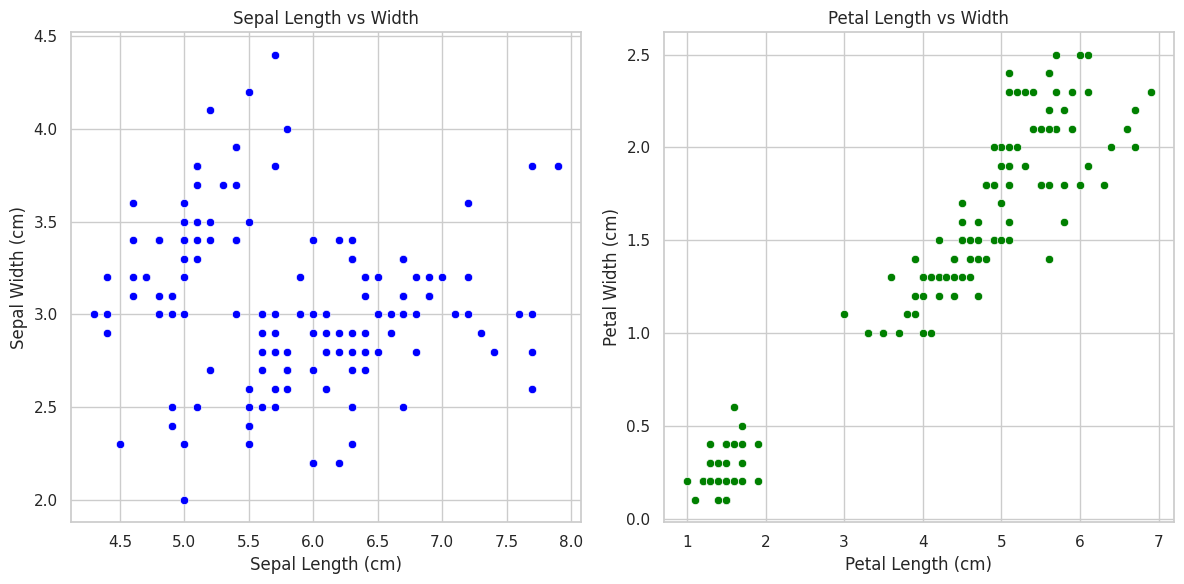

In [13]:
#Langkah Selanjutnya Melakukan Visualisasi

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

# Buat koneksi dengan SQLAlchemy
# Berikan parameter ssl sebagai dictionary untuk PyMySQL
db_url = f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
# Tambahkan connect_args untuk parameter SSL
engine = create_engine(db_url, connect_args={'ssl': {'ssl': {}}})


# Ambil data
query = "SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM irissql;"
df = pd.read_sql(query, engine)

# Visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="sepalLengthCm", y="sepalWidthCm", color='blue')
plt.title("Sepal Length vs Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="petalLengthCm", y="petalWidthCm", color='green')
plt.title("Petal Length vs Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()

### **5. Menghitung k means dengan k dari 2 sampai 4, beserta visualisasi nya**

Kode ini digunakan untuk melakukan pengelompokan data menggunakan algoritma K-Means dengan jumlah klaster (k) dimulai dari 2 hingga 4, sekaligus menyiapkan data untuk divisualisasikan. Pertama, data fitur yang sudah tanpa label diubah menjadi array NumPy agar dapat diproses oleh algoritma. Kemudian, objek KMeans dibuat dengan parameter seperti jumlah klaster yang diinginkan (dalam contoh ini k=2), metode inisialisasi centroid menggunakan `k-means++` untuk mempercepat konvergensi, jumlah inisialisasi ulang sebanyak 10 kali untuk hasil yang lebih stabil, dan pengaturan lain untuk mengatur batas iterasi dan toleransi perubahan. Selanjutnya, model K-Means dilatih pada data fitur tersebut dengan fungsi `.fit()`. Setelah proses clustering selesai, hasil klasterisasi disimpan dalam `labels_` yang menunjukkan klaster masing-masing data, `cluster_centers_` berisi posisi centroid tiap klaster, serta `inertia_` yang mengukur total jarak kuadrat dari setiap titik ke centroidnya, sebagai indikator seberapa rapat klaster tersebut terbentuk. Kode ini merupakan langkah awal untuk mengelompokkan data sekaligus menyiapkan informasi penting untuk analisis dan visualisasi selanjutnya.

In [18]:
#Menghitung k means dengan k dari 2 sampai 4, beserta visualisasi nya

import numpy as np
from sklearn.cluster import KMeans

val_X = np.array([row[1:] for row in data_remove_class])

k_means_C2 = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

k_means_C2.fit(val_X)
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
inertiaC2 = k_means_C2.inertia_

Initialization complete
Iteration 0, inertia 135.61999999999998.
Iteration 1, inertia 105.16576351752823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 216.54999999999995.
Iteration 1, inertia 105.28435999999999.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 159.73000000000002.
Iteration 1, inertia 106.33766372492286.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 144.86999999999998.
Iteration 1, inertia 105.28435999999999.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 199.2599999999999.
Iteration 1, inertia 107.14788485611595.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 160.12000000000003.
Iteration 1,

In [19]:
from sklearn.cluster import KMeans
import numpy as np

# Asumsikan data_remove_class sudah tersedia dan tidak mengandung kolom class
val_X = np.array([row[1:] for row in data_remove_class])

# KMeans untuk k = 3
k_means_C3 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C3.fit(val_X)

# Ambil hasil
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_
InertiaC3 = k_means_C3.inertia_

Initialization complete
Iteration 0, inertia 101.62999999999994.
Iteration 1, inertia 53.71228616780049.
Iteration 2, inertia 49.637470833333346.
Iteration 3, inertia 48.36391864506109.
Iteration 4, inertia 48.168714731262334.
Iteration 5, inertia 48.03795999999999.
Iteration 6, inertia 48.01326442577033.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 74.96999999999998.
Iteration 1, inertia 48.17967067102235.
Iteration 2, inertia 48.03795999999999.
Iteration 3, inertia 48.01326442577033.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 73.51999999999998.
Iteration 1, inertia 53.75499394383634.
Iteration 2, inertia 49.01050335439959.
Iteration 3, inertia 48.4406800962021.
Iteration 4, inertia 48.20424930555555.
Iteration 5, inertia 48.170190905332795.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 58.830000000000005.
Iteration 1, inertia 48.659167658964435.
I

In [20]:
from sklearn.cluster import KMeans
import numpy as np

# Asumsikan data_remove_class sudah tersedia dan tidak mengandung kolom class
val_X = np.array([row[1:] for row in data_remove_class])

# KMeans untuk k = 4
k_means_C4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C4.fit(val_X)

# Ambil hasil
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_
InertiaC4 = k_means_C4.inertia_

Initialization complete
Iteration 0, inertia 50.13.
Iteration 1, inertia 34.51888608441198.
Iteration 2, inertia 34.39441862706302.
Iteration 3, inertia 34.35062490842491.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 54.48999999999999.
Iteration 1, inertia 37.0637319741342.
Iteration 2, inertia 35.33608722668967.
Iteration 3, inertia 34.84717737737736.
Iteration 4, inertia 34.75469840125414.
Iteration 5, inertia 34.67641033278176.
Iteration 6, inertia 34.57568304510763.
Iteration 7, inertia 34.51289444444444.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 63.000000000000014.
Iteration 1, inertia 36.4527138269532.
Iteration 2, inertia 34.98067929577097.
Iteration 3, inertia 34.84717737737736.
Iteration 4, inertia 34.75469840125414.
Iteration 5, inertia 34.67641033278176.
Iteration 6, inertia 34.57568304510763.
Iteration 7, inertia 34.51289444444444.
Converged at iteration 7: strict convergence.
Ini

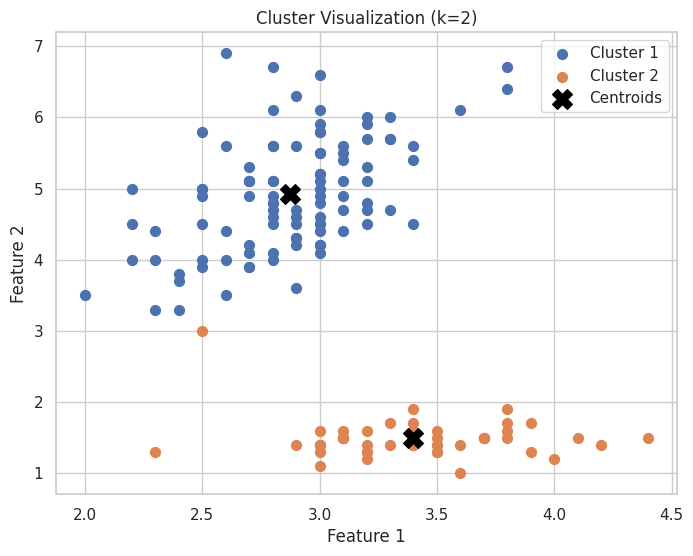

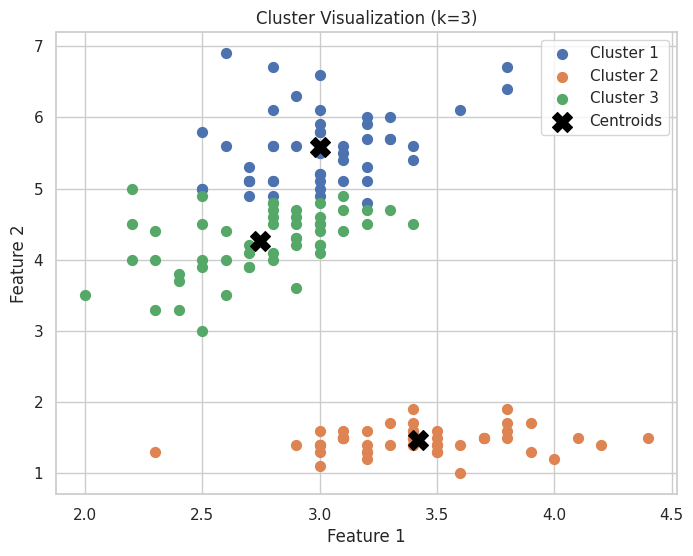

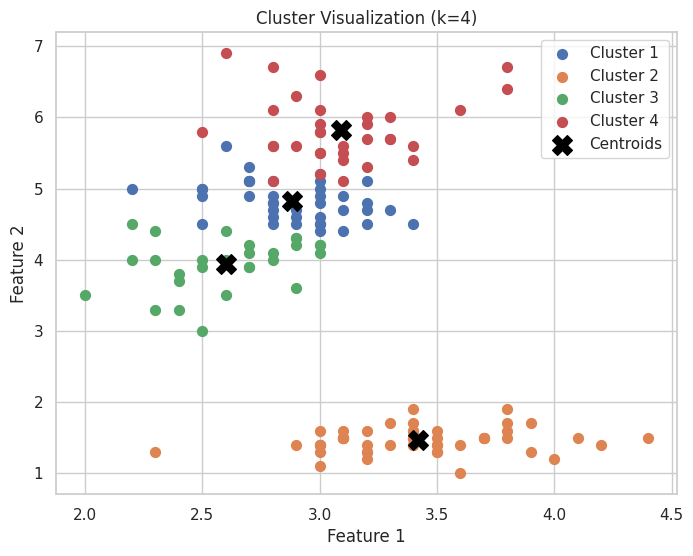

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Misal val_X adalah data yang sudah ada
k_values = [2, 3, 4]  # Uji dengan K=2, K=3, dan K=4

for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42)
    labels = k_means.fit_predict(val_X)

    plt.figure(figsize=(8, 6))

    # Visualisasi cluster
    for i in range(k):
        plt.scatter(val_X[labels == i, 0], val_X[labels == i, 1], s=50, label=f'Cluster {i+1}')

    # Visualisasi centroid
    centroids = k_means.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

    plt.title(f'Cluster Visualization (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

### **6. Menghitung nilai inertia dan siluet score dari setiap k dari 2 sampai 4**

Proses menghitung dua metrik evaluasi penting, yaitu inertia dan silhouette score, untuk setiap jumlah klaster mulai dari 2 hingga 4. Inertia mengukur seberapa rapat data dalam setiap klaster dengan menghitung total jarak kuadrat antara data dan centroidnya, sedangkan silhouette score menilai seberapa baik pemisahan antara klaster dengan membandingkan kedekatan data pada klasternya sendiri dan klaster lain. Dengan membandingkan nilai inertia dan silhouette score untuk tiap jumlah klaster, kita dapat menentukan jumlah klaster yang paling optimal untuk data tersebut.

In [22]:
val_X = df.values
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 2:", kmeans.inertia_)

Inertia dengan k = 2: 152.36870647733915


In [23]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import pymysql

val_X = np.array(df)

k_means = KMeans(n_clusters=2, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k=2: ", sil_score)

Silhouette Score untuk k=2:  0.6808136202936816


In [24]:
val_X = df.values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 3:", kmeans.inertia_)

Inertia dengan k = 3: 78.94506582597728


In [25]:
val_X = np.array(df)

k_means = KMeans(n_clusters=3, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k = 3: ", sil_score)

Silhouette Score untuk k = 3:  0.5509643746707443


In [26]:
val_X = df.values
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 4:", kmeans.inertia_)

Inertia dengan k = 4: 57.44028021295475


In [27]:
val_X = np.array(df)

k_means = KMeans(n_clusters=4, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k = 4: ", sil_score)

Silhouette Score untuk k = 4:  0.4974115445023624


### **7. Visualisasi dari score siluet**

Visualisasi dari skor siluet bertujuan untuk memperlihatkan seberapa baik setiap data dalam sebuah klaster sesuai dengan klasternya dan seberapa jelas batas antara klaster yang satu dengan yang lain. Grafik ini biasanya menampilkan nilai siluet untuk tiap titik data secara terpisah dalam setiap klaster, sehingga memudahkan kita melihat apakah ada data yang mungkin kurang cocok atau klaster yang kurang rapat. Dengan visualisasi ini, kita bisa lebih mudah mengevaluasi kualitas hasil clustering secara detail dan memilih jumlah klaster yang paling tepat berdasarkan pola nilai siluet yang muncul.

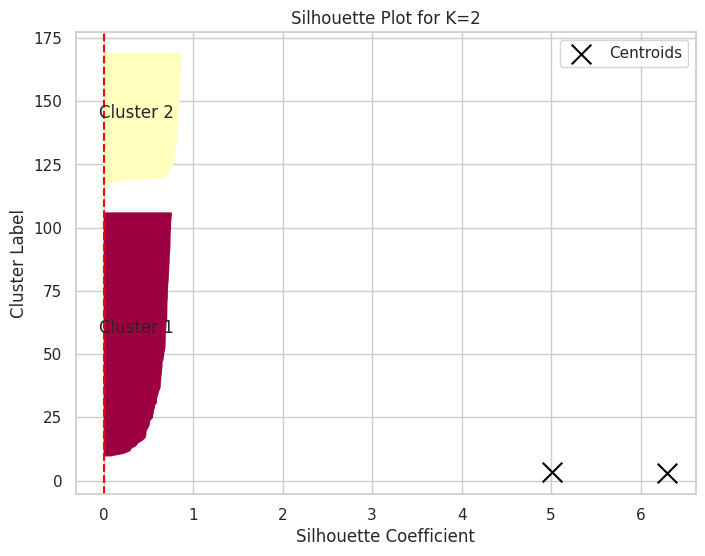

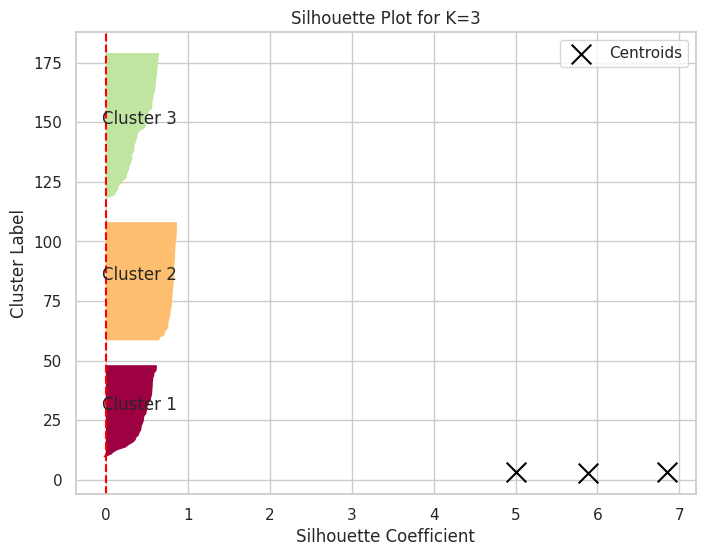

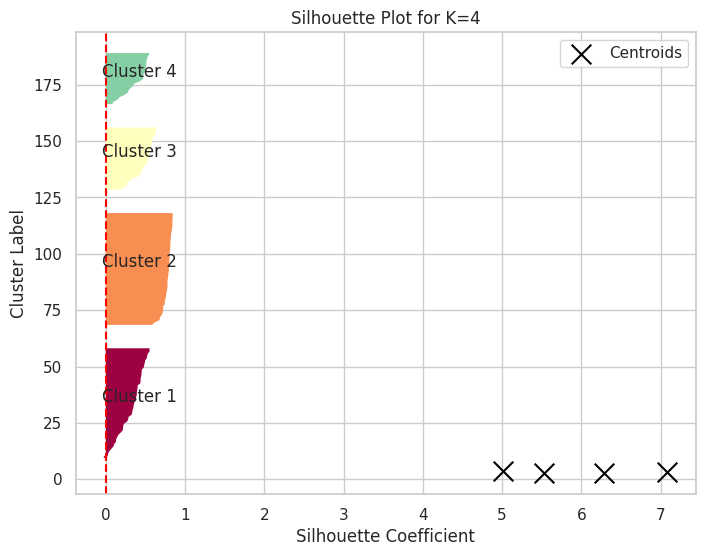

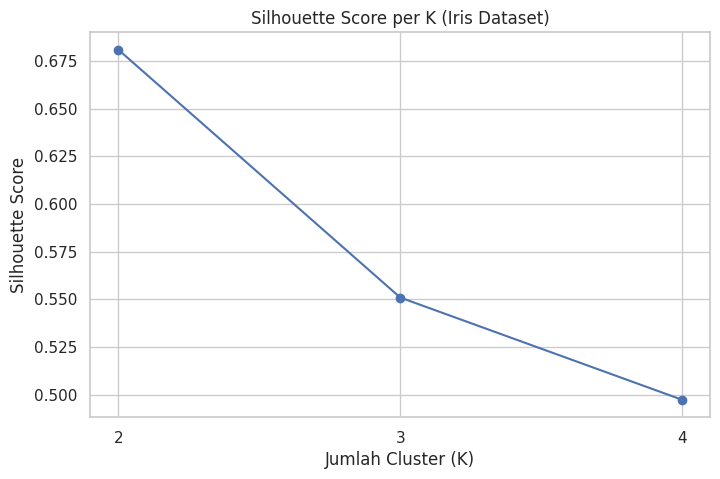


K dengan Silhouette Score terbaik adalah: K = 2


In [29]:
#Visualisasi dari score siluet

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Asumsi data sudah ada di val_X (data yang digunakan untuk clustering)

k_range = range(2, 5)  # Uji untuk K=2, K=3, K=4
silhouette_scores = []
cluster_results = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(val_X)

    # Hitung Silhouette Score
    silhouette_values = silhouette_samples(val_X, labels)
    silhouette_scores.append(silhouette_score(val_X, labels))  # Menyimpan Silhouette Score untuk K

    # Simpan hasil untuk plotting nanti
    cluster_results[k] = {
        'labels': labels,
        'silhouette_values': silhouette_values,
        'centroids': kmeans.cluster_centers_
    }

    # ---- Silhouette Plot untuk K Cluster ----
    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in range(k):  # Loop untuk masing-masing cluster
        ith_cluster_silhouette_values = silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.Spectral(float(i) / k)

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, color=color)
        ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i + 1}', fontsize=12)

        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Plot for K={k}")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=0, color='red', linestyle='--')

    # Centroid visualisation (titik centroid)
    centroids = cluster_results[k]['centroids']
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')

    plt.legend(loc="best")
    plt.show()

# ---- Plot Silhouette Score per K ----
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score per K (Iris Dataset)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Tampilkan K optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK dengan Silhouette Score terbaik adalah: K = {optimal_k}")

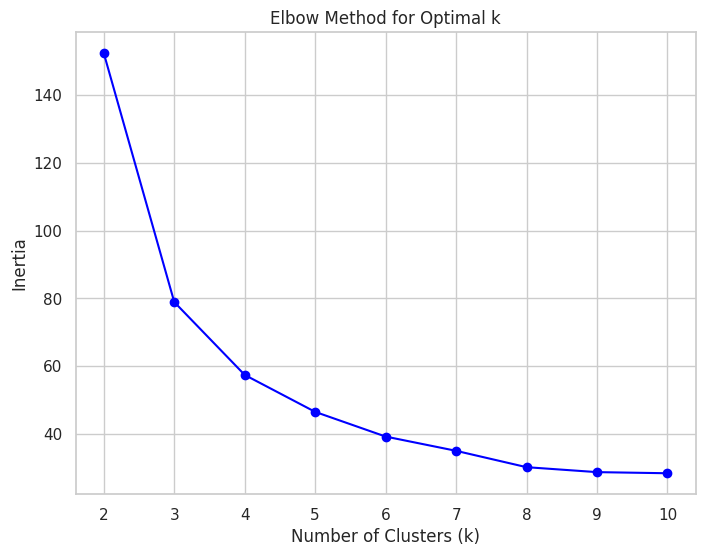

In [30]:
import matplotlib.pyplot as plt

inertia_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(val_X)
    inertia_values.append(kmeans.inertia_)

# Plotting inertia vs k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()